In [1]:
import pandas as pd

data = pd.read_csv('training.csv')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import matplotlib.patches as patches

def addPoint(ax, sample, name):
    x = sample[name + '_x']
    y = sample[name + '_y']
    ax.add_patch(patches.Circle((x, y),1))

def show(sampleId):
    sample = data.iloc[sampleId]
    imageData = sample['Image']
    imageData = [int(x) for x in imageData.split(' ')]
    width, height = 96, 96

    image = np.array(imageData)
    image = np.reshape(image, (width, height))

    fig,ax = plt.subplots()
    addPoint(ax, sample, 'left_eye_inner_corner')
    addPoint(ax, sample, 'left_eye_outer_corner')
    addPoint(ax, sample, 'left_eye_center')

    addPoint(ax, sample, 'right_eye_inner_corner')
    addPoint(ax, sample, 'right_eye_outer_corner')
    addPoint(ax, sample, 'right_eye_center')

    addPoint(ax, sample, 'right_eyebrow_inner_end')
    addPoint(ax, sample, 'right_eyebrow_outer_end')

    addPoint(ax, sample, 'left_eyebrow_inner_end')
    addPoint(ax, sample, 'left_eyebrow_outer_end')

    addPoint(ax, sample, 'nose_tip')

    addPoint(ax, sample, 'mouth_left_corner')
    addPoint(ax, sample, 'mouth_right_corner')

    addPoint(ax, sample, 'mouth_center_top_lip')
    addPoint(ax, sample, 'mouth_center_bottom_lip')
    
    ax.imshow(image, cmap = 'gray')

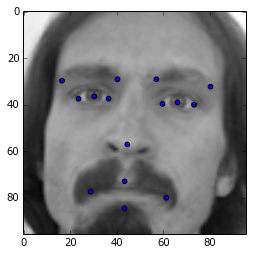

In [4]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

interact(show, sampleId=widgets.IntSlider(min=0,max=len(data)-1,step=1,value=0))

In [5]:
mean = data.mean()

In [6]:
mean

left_eye_center_x            66.359021
left_eye_center_y            37.651234
right_eye_center_x           30.306102
right_eye_center_y           37.976943
left_eye_inner_corner_x      59.159339
left_eye_inner_corner_y      37.944752
left_eye_outer_corner_x      73.330478
left_eye_outer_corner_y      37.707008
right_eye_inner_corner_x     36.652607
right_eye_inner_corner_y     37.989902
right_eye_outer_corner_x     22.384504
right_eye_outer_corner_y     38.033495
left_eyebrow_inner_end_x     56.068513
left_eyebrow_inner_end_y     29.332678
left_eyebrow_outer_end_x     79.482826
left_eyebrow_outer_end_y     29.734861
right_eyebrow_inner_end_x    39.322137
right_eyebrow_inner_end_y    29.502998
right_eyebrow_outer_end_x    15.871177
right_eyebrow_outer_end_y    30.428166
nose_tip_x                   48.374186
nose_tip_y                   62.715884
mouth_left_corner_x          63.285735
mouth_left_corner_y          75.970714
mouth_right_corner_x         32.900404
mouth_right_corner_y     

In [8]:
test = pd.read_csv('test.csv')

In [13]:
class TestResults:
    def __init__(self):
        self.lockupTable = pd.read_csv('IdLookupTable.csv')
        self.table = [0.0] * len(self.lockupTable)
    def setValue(self, imageId, name, value):
        rowId = self.lockupTable[(self.lockupTable['ImageId'] == imageId) & (self.lockupTable['FeatureName'] == name)]
        if len(rowId) != 0:
            self.table[rowId.iloc[0]['RowId'] - 1] = value
            return True
        else:
            return False
    def write(self, filename='test_results.csv'):
        fd = open(filename, 'w')
        fd.write('RowId,Location\n')
        for i in range(len(self.table)):
            fd.write("%d,%f\n"%(i+1,self.table[i]))
        fd.close()
    def columns(self):
        return ['left_eye_center', 'right_eye_center', 'left_eye_inner_corner', 'left_eye_outer_corner', 'right_eye_inner_corner', 'right_eye_outer_corner', 'left_eyebrow_inner_end', 'left_eyebrow_outer_end', 'right_eyebrow_inner_end', 'right_eyebrow_outer_end', 'nose_tip', 'mouth_left_corner', 'mouth_right_corner', 'mouth_center_top_lip', 'mouth_center_bottom_lip']

In [14]:
r = TestResults()
for imageId in range(len(test)):
    for col in r.columns():
        r.setValue(imageId + 1, col + '_x', mean[col + '_x'])
        r.setValue(imageId + 1, col + '_y', mean[col + '_y'])
r.write()

In [7]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
